In [274]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd
import plotly.express as px

Reading files...

In [275]:
%matplotlib inline

In [276]:
plt.rcParams['figure.figsize'] = (20,10)

In [277]:
saved_style_state = matplotlib.rcParams.copy()

In [278]:
pd.set_option('display.max_rows', None)

In [279]:
ev = pd.read_csv("IEA-EV-data.csv")

In [280]:
country = pd.read_csv("countries.csv")

Cleaning file

In [281]:
world_geo = pd.read_csv("world_geo.csv")

world_geo = world_geo.rename({'gdp_md_est': 'sales'}, axis=1)

world_geo = world_geo[(world_geo.name != 'Antarctica')]

world_geo = world_geo.drop('Unnamed: 0', axis=1)

world_geo = world_geo.replace(0, np.nan)


Chloropleth map (total electric vehicle sales)

In [304]:
fig = px.choropleth(world_geo,
    locations = 'iso_a3',
    color = 'sales',
    title = 'Total Electric Vehicle Sales per Country',
    range_color = [0, 1000000],
    color_continuous_scale = 'Plasma',
    
)


fig.show()

Latest sales share

In [283]:
def sales_share_latest(country):
    s = ev[(ev.region == country) & (ev.parameter == 'EV sales share') & (ev.category == 'Historical') & (ev['mode'] == 'Cars')]

    last = s.iloc[-1].value

    return last

Earliest sales share

In [284]:
def sales_share_earliest(country):
    s = ev[(ev.region == country) & (ev.parameter == 'EV sales share') & (ev.category == 'Historical') & (ev['mode'] == 'Cars')]

    first = s.iloc[-2].value

    return first

List of all recorded countries

In [285]:
country_list = []

for c in ev.region:
    if c not in country_list:
        country_list.append(c)

country_list.remove('World')
country_list.remove('Europe')
country_list.remove('Rest of the world')
country_list.remove('Other Europe')
country_list.remove('Indonesia')
country_list.remove('Thailand')

In [286]:
shares_latest = []
for c in country_list:
    shares_latest.append(f"{sales_share_latest(c)}")

shares_earliest = []
for c in country_list:
    shares_earliest.append(f"{sales_share_earliest(c)}")


shares_latest = list(map(float, shares_latest))
shares_earliest = list(map(float, shares_earliest))


In [287]:
df = pd.DataFrame({'2021': shares_latest})
df1 = pd.DataFrame({'2020': shares_earliest})
df2 = pd.DataFrame({'country': country_list})

all_shares = pd.concat([df2, df1, df], axis=1)

all_shares = all_shares.sort_values('2021')




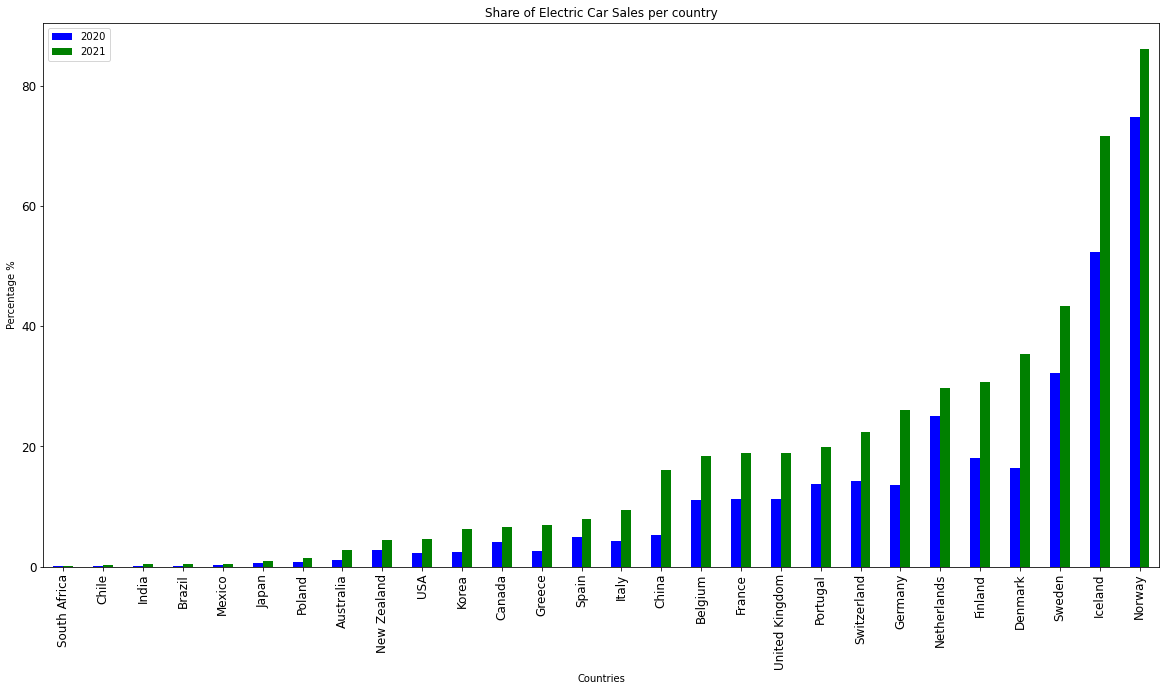

In [302]:


all_shares.plot(kind = 'bar', 
x = 'country', 
stacked = False,
title = 'Share of Electric Car Sales per country',
xlabel = 'Countries',
ylabel = 'Percentage %',
fontsize = '12',
color = {'2020': 'blue','2021': 'green'}
)

plt.show()